In [ ]:
# Step -1: Importing the Necessary modeules 1. Numpy, 2. Pandas, 3. Sckit-Learn, 4. Tensorflow.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense
from scipy import stats
from sklearn.preprocessing import LabelEncoder,label_binarize
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer

In [ ]:
#Step -2: Importing the Dataset csv file
information = pd.read_csv('/Users/liteshperumalla/Desktop/Files/projects/archive/dataset1.csv')
"""pd.options.display.max_rows"""
# Top 5 Rows in the Dataset
print(information.head())
# Total Columns in the Dataset.
"""print(information.to_string())
print(information.info())"""
# Counting the number of Liver Disorder patients
result = information['Result'].value_counts()
count = result.get(1, 0)
print(f"Number of liver patients  detected: {count}")
count = result.get(2, 0)
print(f"Number of no liver patients  detected: {count}")

   age  Gender   Total_Bilirubin  Direct_Bilirubin  \
0  65.0  Female              0.7               0.1   
1  62.0    Male             10.9               5.5   
2  62.0    Male              7.3               4.1   
3  58.0    Male              1.0               0.4   
4  72.0    Male              3.9               2.0   

   Alkphos_Alkaline_Phosphotase  Sgpt_Alamine_Aminotransferase  \
0                         187.0                           16.0   
1                         699.0                           64.0   
2                         490.0                           60.0   
3                         182.0                           14.0   
4                         195.0                           27.0   

   Sgot_Aspartate_Aminotransferase  Total_Protiens  ALB_Albumin  \
0                             18.0             6.8          3.3   
1                            100.0             7.5          3.2   
2                             68.0             7.0          3.3   
3         

In [ ]:
#Number of liver patients  detected: 21917
#Number of no liver patients  detected: 8774
# Info  of Instaces / Columns in the Dataset
print(information.shape)
#Step -3: Data Cleaning : Checking for the Null values in the Dataset.
print(information.isnull().sum())
#Replacing Null values with the Mean value
#Using the bfill method to fill values by backwards.
information= information.bfill()
print(information.isnull().sum())

(30691, 11)
age                                       2
Gender                                  902
Total_Bilirubin                         648
Direct_Bilirubin                        561
Alkphos_Alkaline_Phosphotase            796
Sgpt_Alamine_Aminotransferase           538
Sgot_Aspartate_Aminotransferase         462
Total_Protiens                          463
ALB_Albumin                             494
A/G_Ratio_Albumin_and_Globulin_Ratio    559
Result                                    0
dtype: int64
age                                     0
Gender                                  0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64


In [ ]:
#Converting the Categorical datatype to numerical Datatype.
#Looking for the categorical variables
print(information.columns)
# FInding the column in the Dataset
print('Gender ' in information)
#changing the datatype using the astype method in pandas.
information['Gender '] = information['Gender '].astype('category').cat.codes
#Checking for changes
print(information.info())
#Gives the statistics of the DataFrame.
print(information.describe())
#Checking the Duplicate Values
print(information.drop_duplicates())
print(information.info())

Index(['age ', 'Gender ', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   30691 non-null  float64
 1   Gender                                30691 non-null  int8   
 2   Total_Bilirubin                       30691 non-null  float64
 3   Direct_Bilirubin                      30691 non-null  float64
 4   Alkphos_Alkaline_Phosphotase          30691 non-null  float64
 5   Sgpt_Alamine_Aminotransferase         30691 non-null  float64
 6   Sgot_Aspartate_Aminotransferase       30691 non-null 

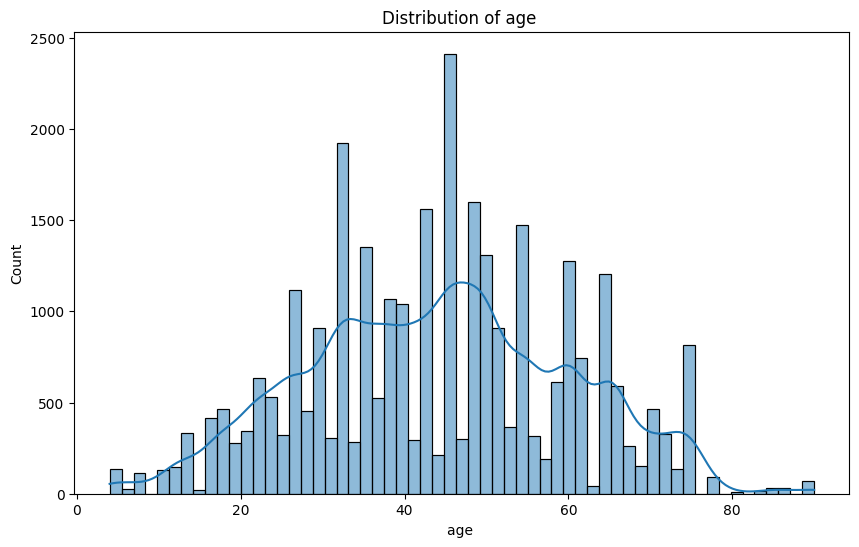

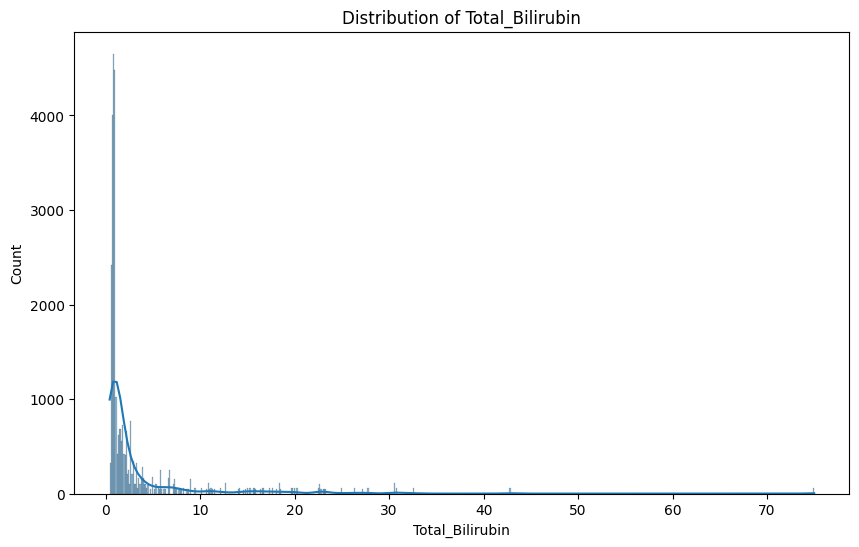

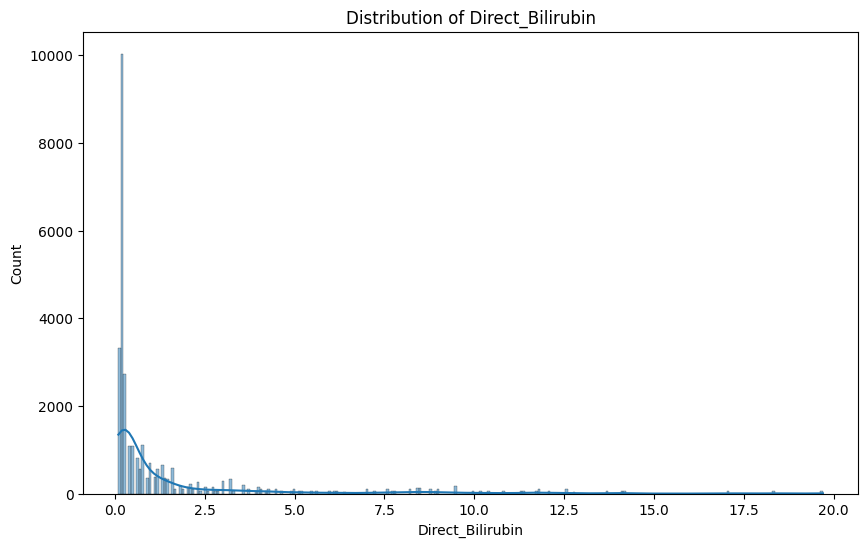

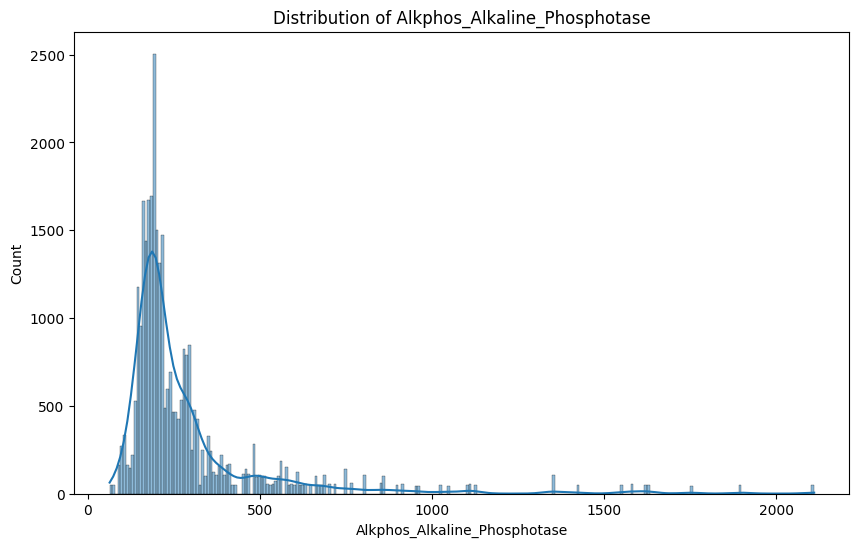

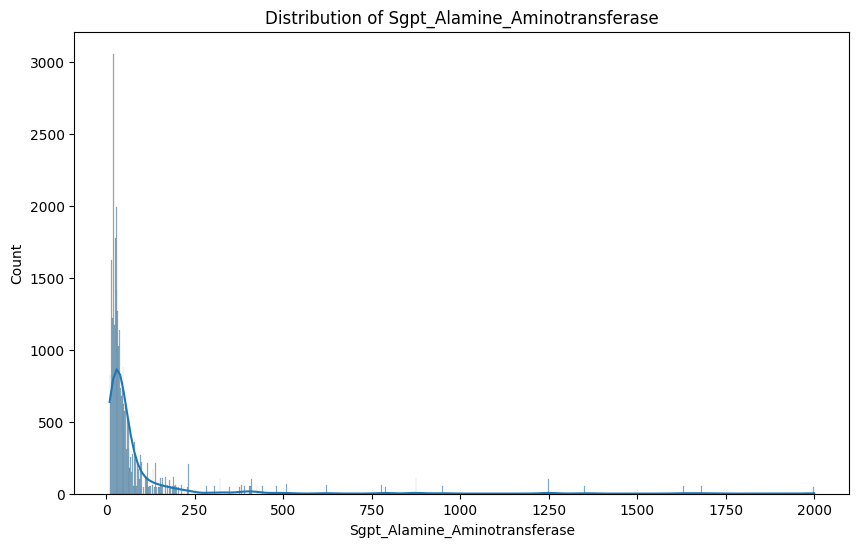

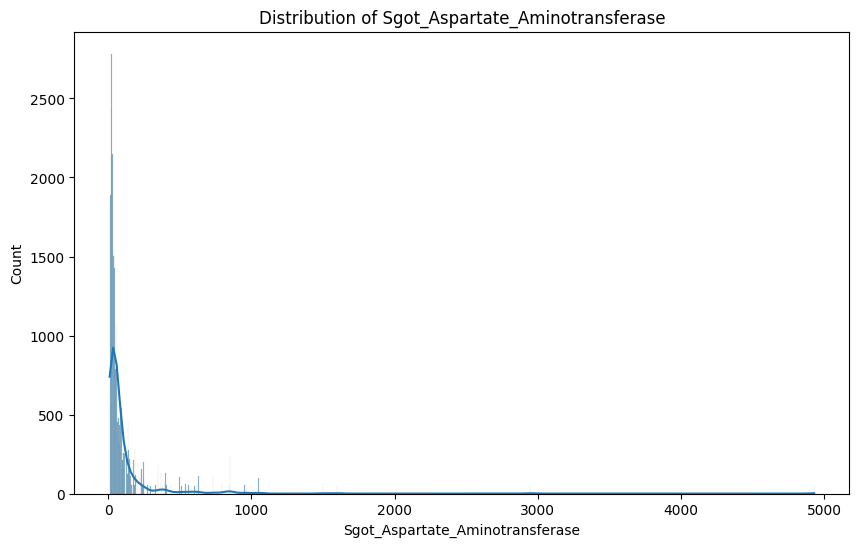

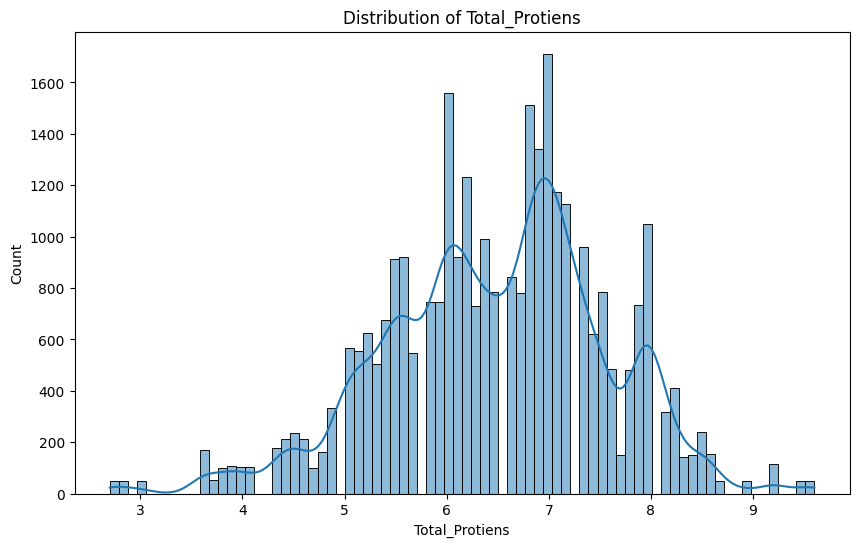

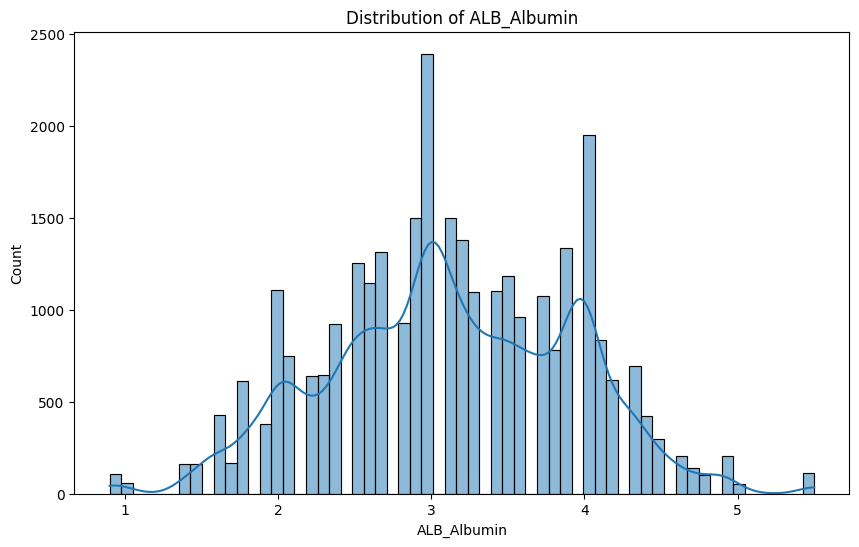

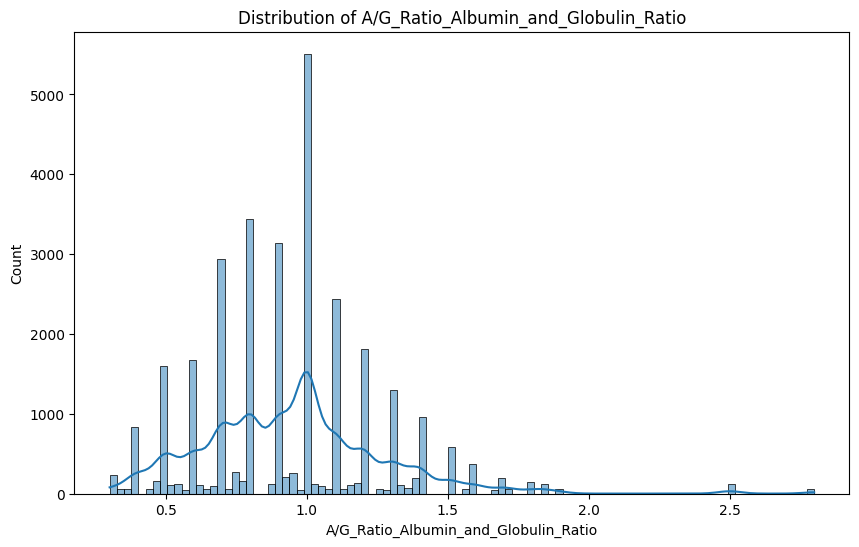

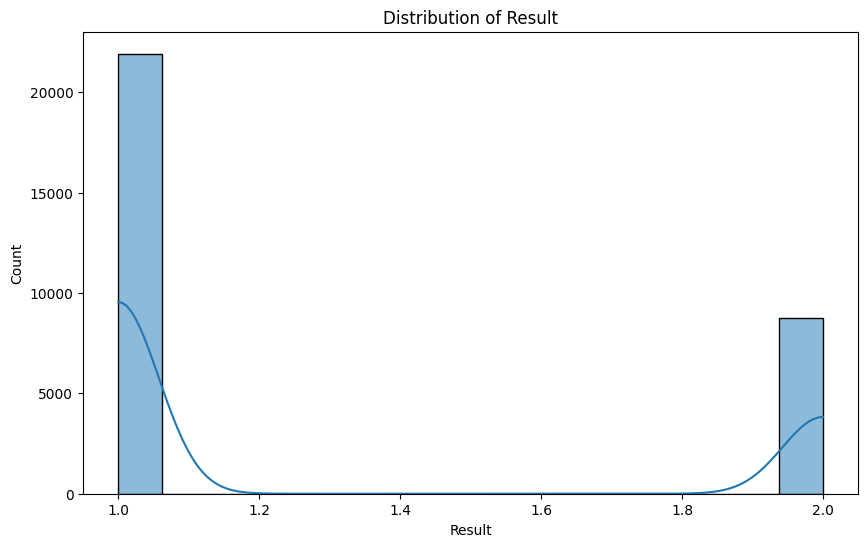

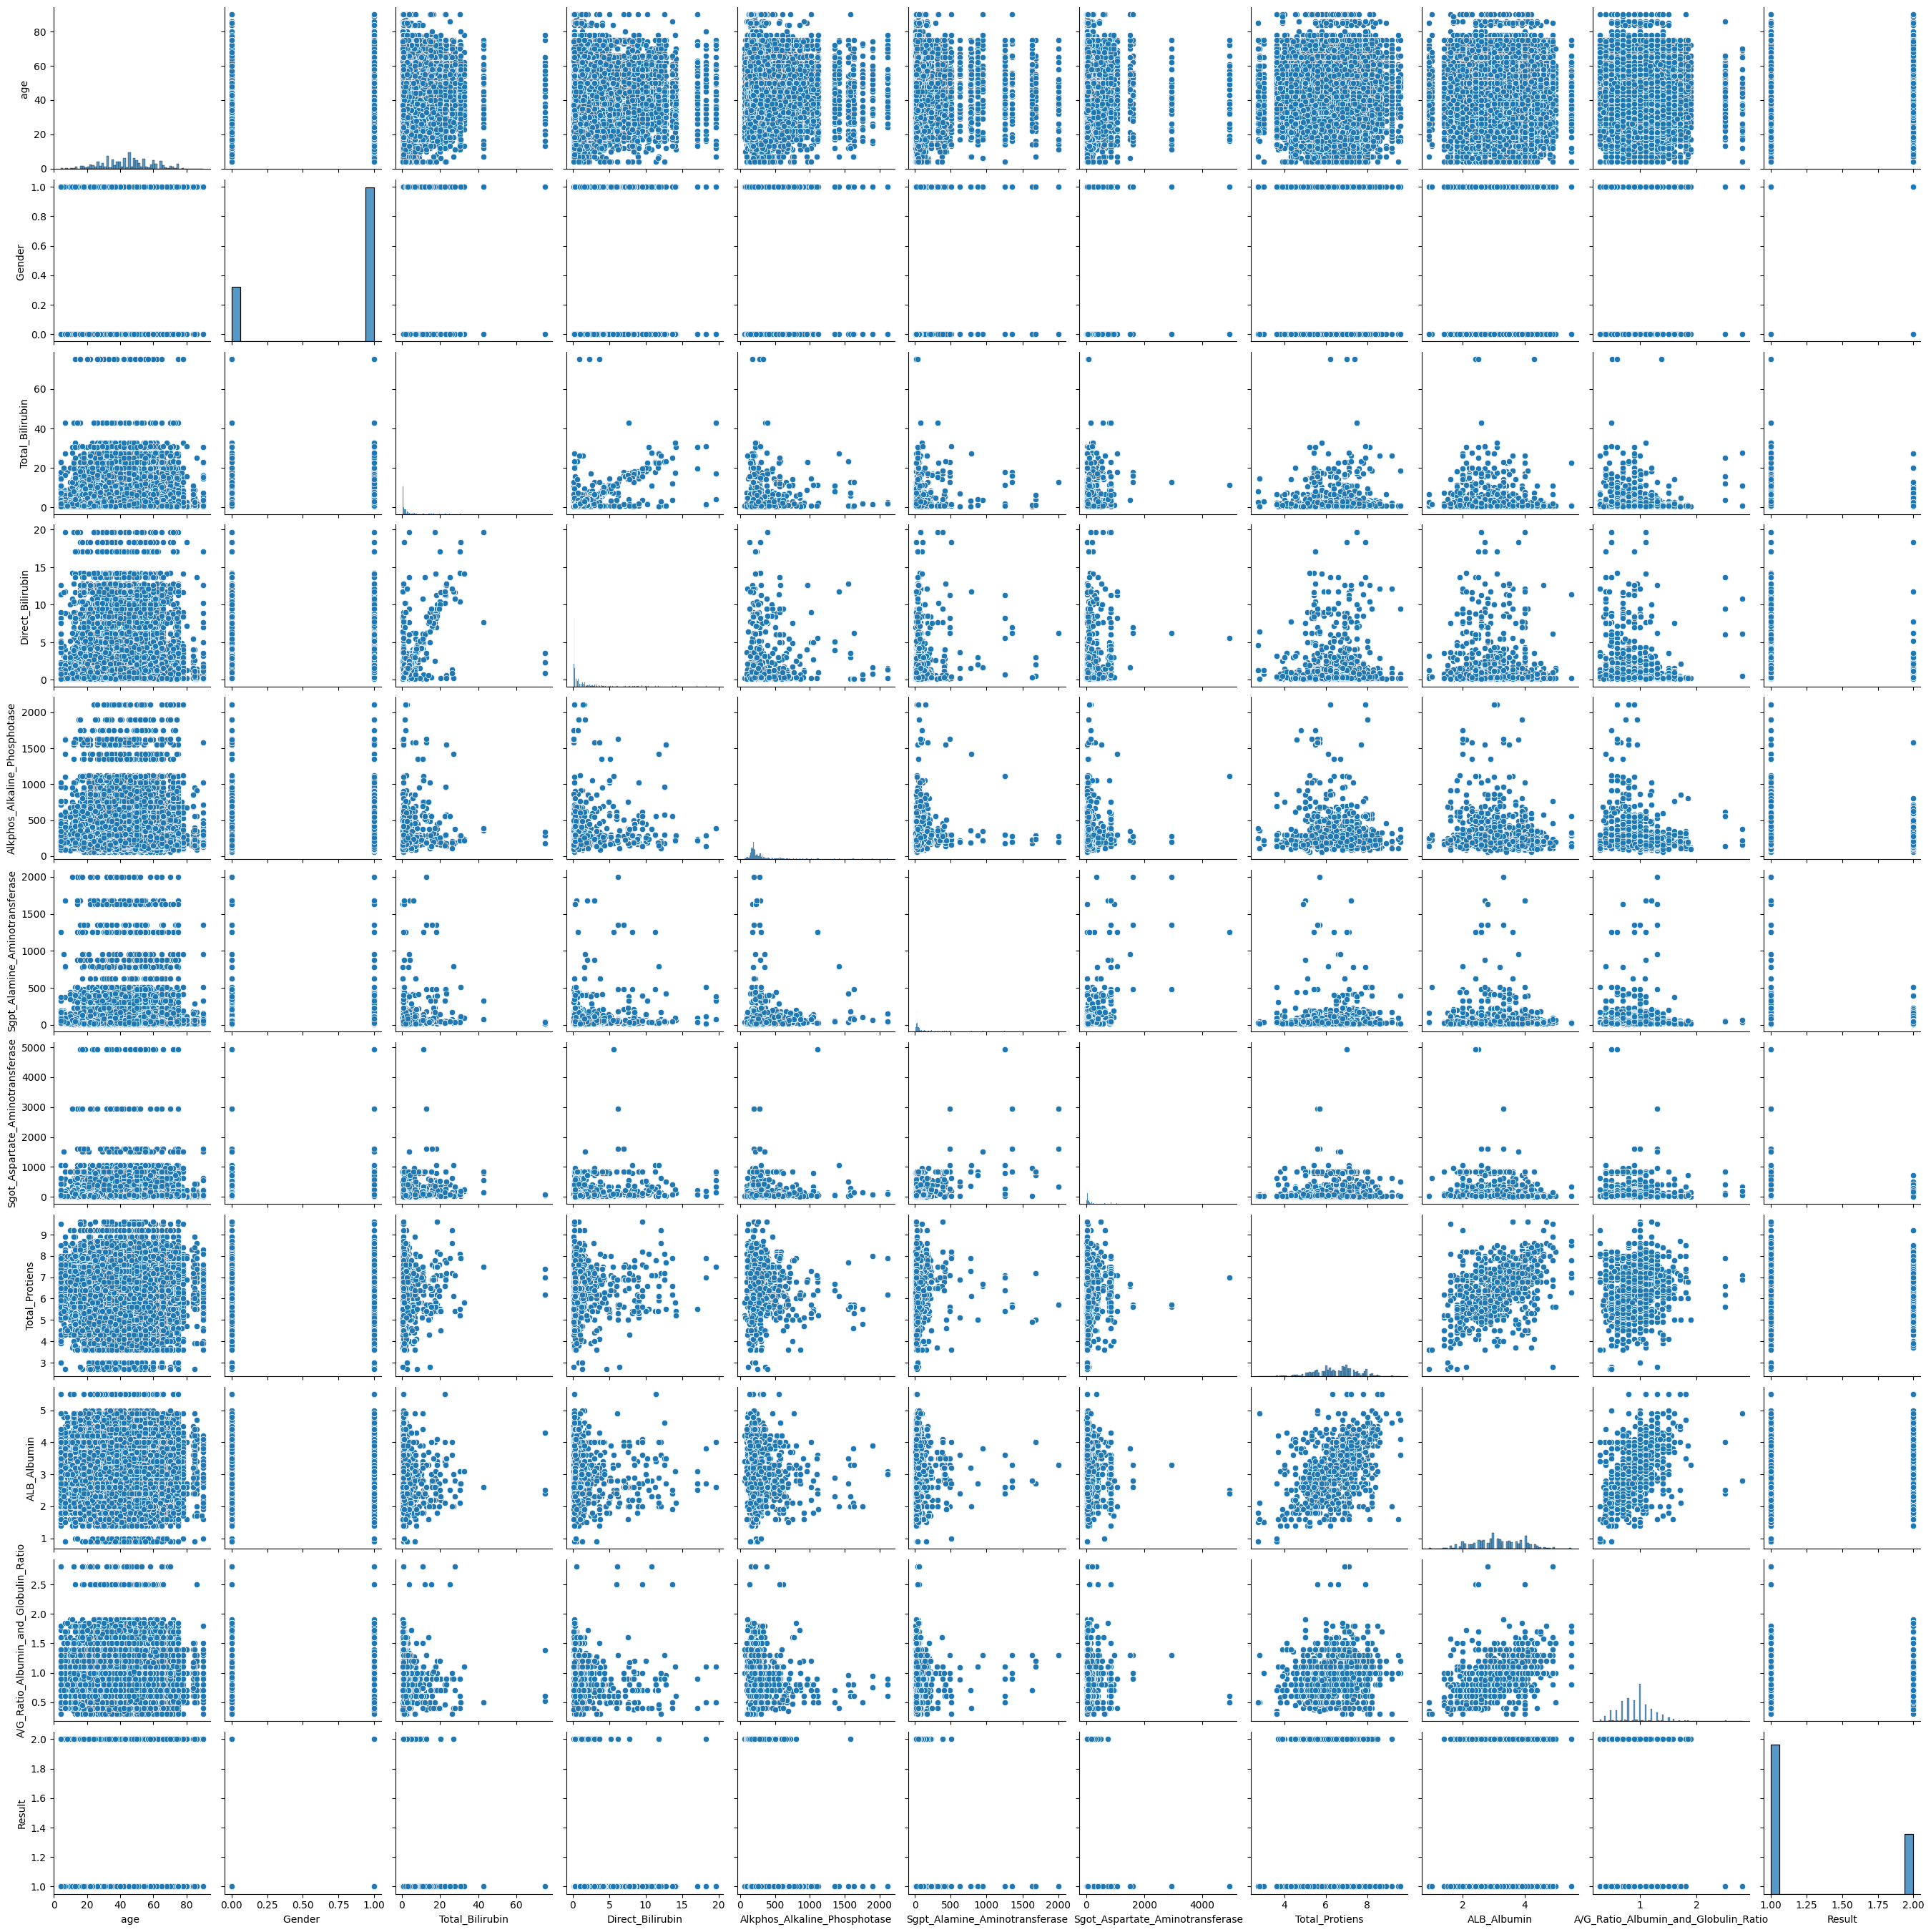

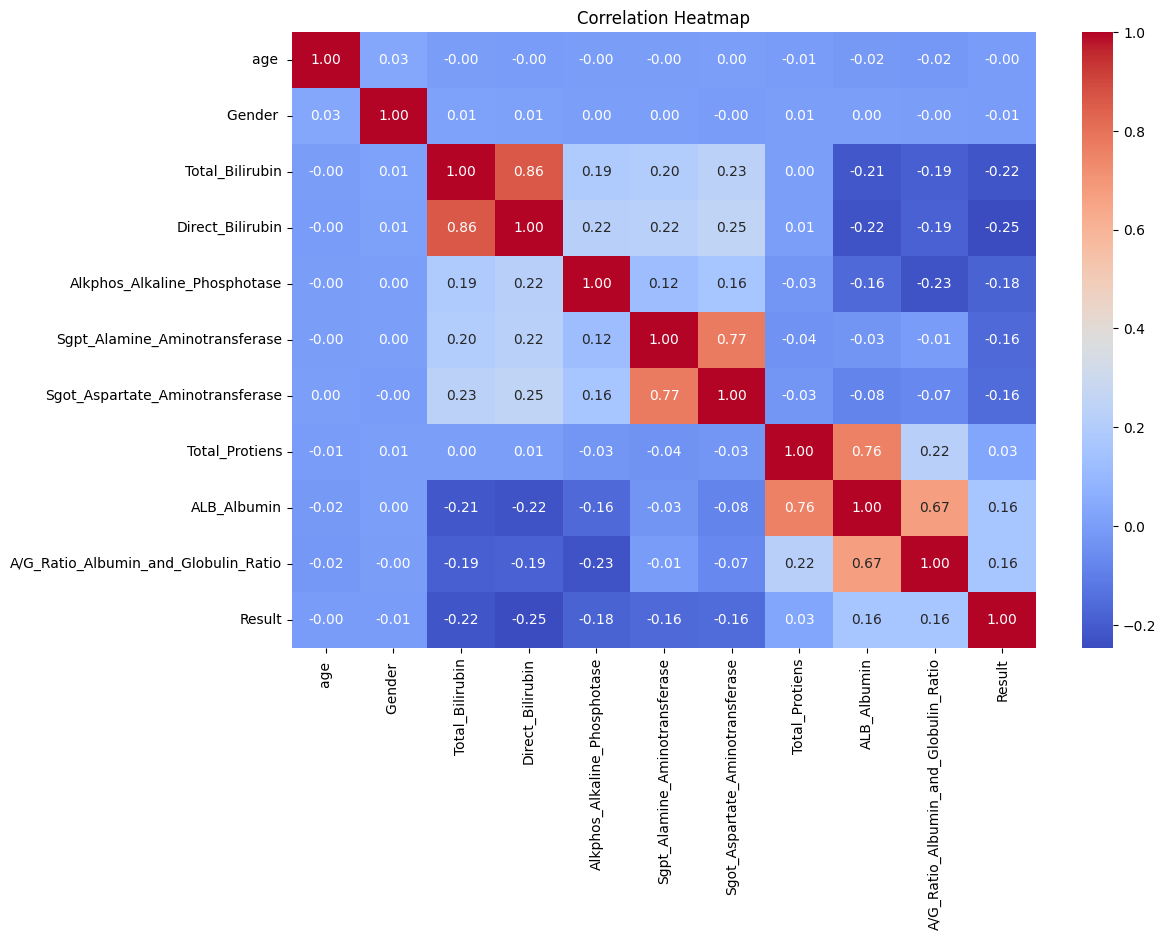

In [ ]:
# Previous there are 30691
#After Dropping the rows there are 30691 so, there are no Duplicate values.
#exploratory Data Analysis
numeric_columns = information.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(information[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
sns.pairplot(information)
plt.show()
correlation_matrix = information.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
categorical_columns = information.select_dtypes(include='object').columns
for cat_column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_column, y='target_variable', data=information)
    plt.title(f'Box plot of {cat_column} vs. target_variable')
    plt.show()

In [ ]:
#Checkin for the outliers
z_scores = stats.zscore(information[['age ','Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio']])
abs_z_scores = np.abs(z_scores)
threshold = 3
outliers = abs(z_scores) > threshold
print("Outliers:")

Outliers:


In [ ]:
#Identified Outliers shown as True
print(outliers)
#Removing the Outliers
new_information = information[(np.abs(stats.zscore(information.select_dtypes(exclude='object'))) < 1).all(axis=1)]
print(new_information)

        age   Total_Bilirubin  Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
0      False            False             False                         False   
1      False            False             False                         False   
2      False            False             False                         False   
3      False            False             False                         False   
4      False            False             False                         False   
...      ...              ...               ...                           ...   
30686  False            False             False                         False   
30687  False            False             False                         False   
30688  False            False             False                         False   
30689  False            False             False                         False   
30690  False            False             False                         False   

       Sgpt_Alamine_Aminotr

In [ ]:
# Totla number of rows are 3832
#Converting datavalues of result from 2 to 0 and 1 to 1
information['Result'] = information['Result'].map({2:0,1:1})
print(information)
#Identifying the type of Disorders
"""Types of Disorders
1.Jaundice (Bilirubin is higher).
2.Gilbert's Syndrome.
3.Chirrosis.
4. None
5. None
6. Dehydration, Chronic Liver Diseases.
7.Hepatitis
8.cirrhosis, hepatitis, and fatty liver disease.
9.Jaundice, Dehydration, Chronic Inflammatory Conditions.
10. Not required
Hepatitis caused when elevated sgot_AST sgpt_ALT and bilirubin (1,2,3,4,5)
Chirrosis casued when elevated sgot_AST sgpt_ALT bilirubin and low Albumin (1,2,3,4,5,7)
Fatty liver disease when elevated sgot_AST sgpt_ALT and Alkphos_Alkaline_Phosphotase (3,4,5,7)
"""

       age   Gender   Total_Bilirubin  Direct_Bilirubin  \
0      65.0        0              0.7               0.1   
1      62.0        1             10.9               5.5   
2      62.0        1              7.3               4.1   
3      58.0        1              1.0               0.4   
4      72.0        1              3.9               2.0   
...     ...      ...              ...               ...   
30686  50.0        1              2.2               1.0   
30687  55.0        1              2.9               1.3   
30688  54.0        1              6.8               3.0   
30689  48.0        0              1.9               1.0   
30690  30.0        1              3.1               1.6   

       Alkphos_Alkaline_Phosphotase  Sgpt_Alamine_Aminotransferase  \
0                             187.0                           16.0   
1                             699.0                           64.0   
2                             490.0                           60.0   
3          

"Types of Disorders\n1.Jaundice (Bilirubin is higher).\n2.Gilbert's Syndrome.\n3.Chirrosis.\n4. None\n5. None\n6. Dehydration, Chronic Liver Diseases.\n7.Hepatitis\n8.cirrhosis, hepatitis, and fatty liver disease.\n9.Jaundice, Dehydration, Chronic Inflammatory Conditions.\n10. Not required\nHepatitis caused when elevated sgot_AST sgpt_ALT and bilirubin (1,2,3,4,5)\nChirrosis casued when elevated sgot_AST sgpt_ALT bilirubin and low Albumin (1,2,3,4,5,7)\nFatty liver disease when elevated sgot_AST sgpt_ALT and Alkphos_Alkaline_Phosphotase (3,4,5,7)\n"

In [ ]:
information['disorder'] = ' '
information.loc[(information['Result'] == 1) & (information['Total_Bilirubin'] > 1.2), 'disorder'] += '1'
information.loc[(information['Result'] == 1) & (information['Direct_Bilirubin'] > 0.3), 'disorder'] += '2'
information.loc[(information['Result'] == 1) & (information['Alkphos_Alkaline_Phosphotase'] > 140), 'disorder'] += '3'
information.loc[(information['Result'] == 1) & (information['Sgpt_Alamine_Aminotransferase'] > 56), 'disorder'] += '4'
information.loc[(information['Result'] == 1) & (information['Sgot_Aspartate_Aminotransferase'] > 40), 'disorder'] += '5'
information.loc[(information['Result'] == 1) & (information['Total_Protiens'] > 8.3), 'disorder'] += '6'
information.loc[(information['Result'] == 1) & (information['ALB_Albumin'] < 5.5), 'disorder'] += '7'
information.loc[(information['Result'] == 1) & (information['ALB_Albumin'] > 5.5), 'disorder'] += '8'
information.loc[(information['Result'] == 1) & (information['A/G_Ratio_Albumin_and_Globulin_Ratio'] > 2.2), 'disorder'] += '9'
result_1_disorders = information.loc[information['Result'] == 1, 'disorder'].value_counts()
print(result_1_disorders)
print(information['disorder'].unique())
information.loc[information['Result'] == '0', 'disorder'] = 'No disorder'
#Categorizing the Disorders

disorder
123457     5410
37         4735
12357      3184
1237       2169
357        1755
3457       1490
7           619
237         532
2357        371
367         185
57          149
127         111
3567        102
36           93
23457        91
34567        90
347          71
12457        64
123579       63
1234567      62
1234579      60
124567       57
1347         56
12579        53
1257         53
2457         51
1357         50
457          49
12347        31
137          25
13457        23
257          16
2367          6
3             5
              4
1457          4
2347          4
123           4
123567        4
23579         3
134567        3
1367          2
23567         2
234567        2
6             1
13567         1
356           1
67            1
Name: count, dtype: int64
[' 37' ' 123457' ' 237' ' 12357' ' 1237' ' ' ' 357' ' 3457' ' 2357' ' 347'
 ' 7' ' 57' ' 34567' ' 36' ' 367' ' 3567' ' 23457' ' 1257' ' 1347' ' 457'
 ' 127' ' 2457' ' 124567' ' 1234567' ' 12457' ' 

In [ ]:
disorder_map = {
    ' 123457': 'Hepatitis',
    ' 7': 'Hepatitis',
    ' 12357': 'Cirrhosis',
    ' 1237': 'Cirrhosis',
    ' 3457': 'Fatty Liver Disease',
    ' 357': 'Fatty Liver Disease',
    ' 37': 'Chronic Liver Diseases',
    ' 237': 'Liver Tumors',
    ' 2357': 'Liver Tumors',
    ' 123579': 'Jaundice',
    ' 1234579': 'Jaundice',
    ' 12579': 'Jaundice',
    ' 23579': 'Jaundice',
    ' 1347' : 'Hepatitis',
    ' 1234567': 'Cirrhosis',
    ' 1234579': 'Cirrhosis',
    ' 1234579': 'Cirrhosis',
    ' 3567': 'Liver Disease',
    ' 367': 'Liver Disease',


}

In [ ]:
information['disorder'] = information['disorder'].apply(lambda x: disorder_map.get(x, 'Not Disorder'))
information.to_csv('/Users/liteshperumalla/Desktop/Files/projects/archive/output.csv')
num_unique_disorders = information['disorder'].nunique()
print("Number of different disorders:", num_unique_disorders)
disorder_counts = information['disorder'].value_counts()
print("Types of disorders and their frequencies:")
for disorder, count in disorder_counts.items():
    print(f"{disorder}: {count}")
#changing Data type to integer
information.info()
label_encoder = LabelEncoder()
y_disorder_encoded = label_encoder.fit_transform(information['disorder'])

Number of different disorders: 8
Types of disorders and their frequencies:
Not Disorder: 9842
Hepatitis: 6085
Cirrhosis: 5475
Chronic Liver Diseases: 4735
Fatty Liver Disease: 3245
Liver Tumors: 903
Liver Disease: 287
Jaundice: 119
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   30691 non-null  float64
 1   Gender                                30691 non-null  int8   
 2   Total_Bilirubin                       30691 non-null  float64
 3   Direct_Bilirubin                      30691 non-null  float64
 4   Alkphos_Alkaline_Phosphotase          30691 non-null  float64
 5   Sgpt_Alamine_Aminotransferase         30691 non-null  float64
 6   Sgot_Aspartate_Aminotransferase       30691 non-null  float64
 7   Total_Protiens                        30691 non-nul

       age   Gender   Total_Bilirubin  Direct_Bilirubin  \
0  0.709302        0         0.004021          0.000000   
1  0.674419        1         0.140751          0.275510   
2  0.674419        1         0.092493          0.204082   
3  0.627907        1         0.008043          0.015306   
4  0.790698        1         0.046917          0.096939   

   Alkphos_Alkaline_Phosphotase  Sgpt_Alamine_Aminotransferase  \
0                      0.060576                       0.003015   
1                      0.310699                       0.027136   
2                      0.208598                       0.025126   
3                      0.058134                       0.002010   
4                      0.064485                       0.008543   

   Sgot_Aspartate_Aminotransferase  Total_Protiens  ALB_Albumin  \
0                         0.001626        0.594203     0.521739   
1                         0.018296        0.695652     0.500000   
2                         0.011791        0.623

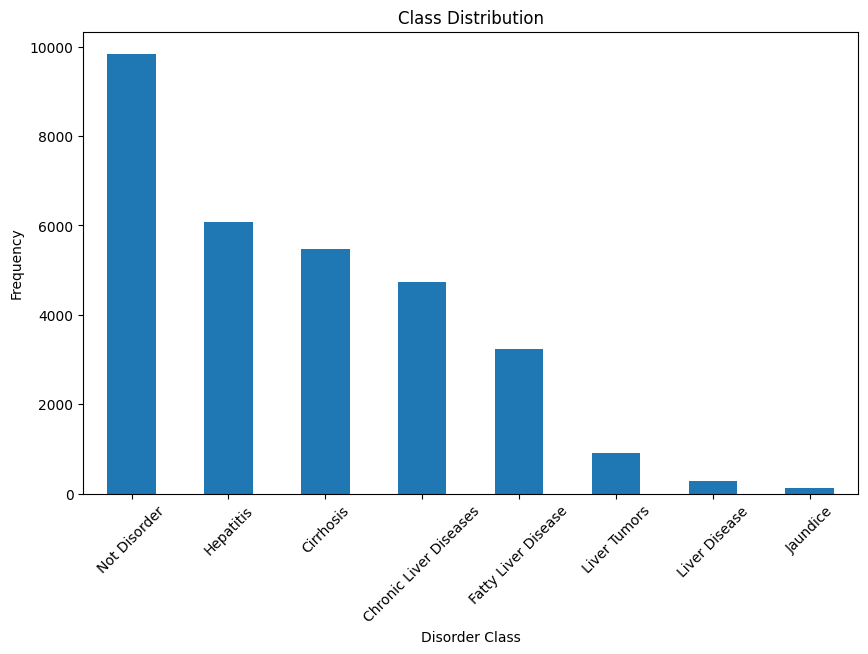

In [ ]:
#min-max Scaling
# Select only numeric columns for min-max scaling
numeric_columns = information.select_dtypes(include=['float64', 'int64']).columns
# Perform min-max scaling on numeric columns
for column in numeric_columns:
    information[column] = (information[column] - information[column].min()) / (information[column].max() - information[column].min())
print(information.head())

X = information.iloc[:, :-2]
y_result = information['Result']
y_disorder = information['disorder']
# Feature Engineering
# Selecting top k features based on ANOVA F-value for 'Result' prediction
selector_result = SelectKBest(score_func=f_classif, k=10) 
X_selected_result = selector_result.fit_transform(X, y_result)

# Selecting top k features based on ANOVA F-value for 'disorder' prediction
selector_disorder = SelectKBest(score_func=f_classif, k=10)
X_selected_disorder = selector_disorder.fit_transform(X, y_disorder)
# Feature Scaling for 'Result' prediction
scaler_result = StandardScaler()
X_scaled_result = scaler_result.fit_transform(X_selected_result)

# Feature Scaling for 'disorder' prediction
scaler_disorder = StandardScaler()
X_scaled_disorder = scaler_disorder.fit_transform(X_selected_disorder)
# Calculate the distribution of class labels
class_distribution = information['disorder'].value_counts()

# Visualize class distribution using a bar plot
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.xlabel('Disorder Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Print class distribution
print("Class Distribution:")
print(class_distribution)
selector_result = SelectKBest(score_func=f_classif, k=10) 
X_selected_result = selector_result.fit_transform(X, y_result)

Class Distribution:
disorder
Not Disorder              9842
Hepatitis                 6085
Cirrhosis                 5475
Chronic Liver Diseases    4735
Fatty Liver Disease       3245
Liver Tumors               903
Liver Disease              287
Jaundice                   119
Name: count, dtype: int64


In [ ]:
# Selecting top k features based on ANOVA F-value for 'disorder' prediction
selector_disorder = SelectKBest(score_func=f_classif, k=10)
X_selected_disorder = selector_disorder.fit_transform(X, y_disorder)
# Split the data into train and test sets
X_train, X_test, y_result_train, y_result_test, y_disorder_train, y_disorder_test = train_test_split(X, y_result, y_disorder, test_size=0.2, random_state=42)
# Feature Scaling for 'Result' prediction
scaler_result = StandardScaler()
X_scaled_result = scaler_result.fit_transform(X_selected_result)

# Feature Scaling for 'disorder' prediction
scaler_disorder = StandardScaler()
X_scaled_disorder = scaler_disorder.fit_transform(X_selected_disorder)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_result_train_resampled = smote.fit_resample(X_train, y_result_train)

In [ ]:
# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(300, 300), max_iter=1000)

# Fit the classifier to the balanced data
mlp_classifier.fit(X_train_resampled, y_result_train_resampled)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifiers = {
    'Neural Network': MLPClassifier(hidden_layer_sizes=(300, 300), max_iter=1000)
}
def create_mlp_classifier():
    return MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
# Cross-validate for 'Result' prediction
mlp_classifier = create_mlp_classifier()
#mlp_classifier.fit(X_train_resampled, y_result_train_resampled, class_weight=class_weights)
cv_results = cross_validate(mlp_classifier, X_train, y_result_train, cv=5, scoring='accuracy', return_train_score=False)
print("Cross-Validation Scores for 'Result' prediction:", cv_results)

# Grid search for hyperparameters
param_grid = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
     'max_iter': [1000],
     'random_state': [42],
}
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_result_train)
print("Best Hyperparameters for 'Result' prediction:", grid_search.best_params_)
mean_accuracy = np.mean(grid_search.cv_results_['mean_test_score'])
print(f"Mean Accuracy for 'Result' prediction: {mean_accuracy:.2f}")
# Hyperparameter Tuning for 'disorder' prediction
param_grid_disorder = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
     'max_iter': [1000],
     'random_state': [42],
}
grid_search_disorder = GridSearchCV(mlp_classifier, param_grid_disorder, cv=5, scoring='accuracy')
grid_search_disorder.fit(X_scaled_disorder, y_disorder)


# Train and evaluate model for 'Result' prediction
best_model_result = grid_search.best_estimator_
best_model_result.fit(X_train, y_result_train)
y_result_pred = best_model_result.predict(X_test)
accuracy_result = accuracy_score(y_result_test, y_result_pred)
report_result = classification_report(y_result_test, y_result_pred)
print("Evaluation for 'Result' prediction:")
print(f"Accuracy: {accuracy_result:.2f}")
print(report_result)

Cross-Validation Scores for 'Result' prediction: {'fit_time': array([58.23519611, 49.40313888, 35.12900996, 46.54206109, 52.83637905]), 'score_time': array([0.00483799, 0.00578809, 0.00414801, 0.00622678, 0.00465393]), 'test_score': array([0.96945632, 0.96497658, 0.97515275, 0.97678208, 0.97718941])}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters for 'Result' prediction: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
Mean Accuracy for 'Result' prediction: 0.90
Evaluation for 'Result' prediction:
Accuracy: 0.92
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1710
         1.0       0.94      0.96      0.95      4429

    accuracy                           0.92      6139
   macro avg       0.91      0.90      0.90      6139
weighted avg       0.92      0.92      0.92      6139



In [ ]:
# Train and evaluate model for 'Result' prediction
best_model_result = grid_search.best_estimator_
best_model_result.fit(X_train, y_result_train)
y_result_pred = best_model_result.predict(X_test)
accuracy_result = accuracy_score(y_result_test, y_result_pred)
report_result = classification_report(y_result_test, y_result_pred)
print("Evaluation for 'Result' prediction:")
print(f"Accuracy: {accuracy_result:.2f}")
print(report_result)

Evaluation for 'Result' prediction:
Accuracy: 0.92
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1710
         1.0       0.94      0.96      0.95      4429

    accuracy                           0.92      6139
   macro avg       0.91      0.90      0.90      6139
weighted avg       0.92      0.92      0.92      6139



In [ ]:
# Train and evaluate model for 'disorder' prediction
mlp_classifier_disorder = create_mlp_classifier()
mlp_classifier_disorder.fit(X_train, y_disorder_train)
y_disorder_pred = mlp_classifier_disorder.predict(X_test)
accuracy_disorder = accuracy_score(y_disorder_test, y_disorder_pred)
report_disorder = classification_report(y_disorder_test, y_disorder_pred)
print("Evaluation for 'disorder' prediction:")
print(f"Accuracy: {accuracy_disorder:.2f}")
print(report_disorder)

Evaluation for 'disorder' prediction:
Accuracy: 0.98
                        precision    recall  f1-score   support

Chronic Liver Diseases       0.99      0.96      0.97       967
             Cirrhosis       0.99      0.99      0.99      1091
   Fatty Liver Disease       0.98      0.98      0.98       665
             Hepatitis       0.99      1.00      1.00      1243
              Jaundice       0.97      1.00      0.98        30
         Liver Disease       0.98      0.97      0.98        61
          Liver Tumors       0.98      0.99      0.99       170
          Not Disorder       0.97      0.98      0.97      1912

              accuracy                           0.98      6139
             macro avg       0.98      0.98      0.98      6139
          weighted avg       0.98      0.98      0.98      6139



In [ ]:
# Calculate ROC AUC scores for 'Result' prediction
y_result_scores_train = best_model_result.predict_proba(X_train)[:, 1]
y_result_scores_test = best_model_result.predict_proba(X_test)[:, 1]
auc_train_result = roc_auc_score(y_result_train, y_result_scores_train)
auc_test_result = roc_auc_score(y_result_test, y_result_scores_test)
print("ROC AUC scores for 'Result' prediction:")
print(f'Train ROC AUC = {auc_train_result:.3f}, Test ROC AUC = {auc_test_result:.3f}')
# Print other relevant attributes and parameters as needed
fpr_result, tpr_result, _ = roc_curve(y_result_test, y_result_scores_test)
roc_auc_result = auc(fpr_result, tpr_result)

ROC AUC scores for 'Result' prediction:
Train ROC AUC = 0.979, Test ROC AUC = 0.970


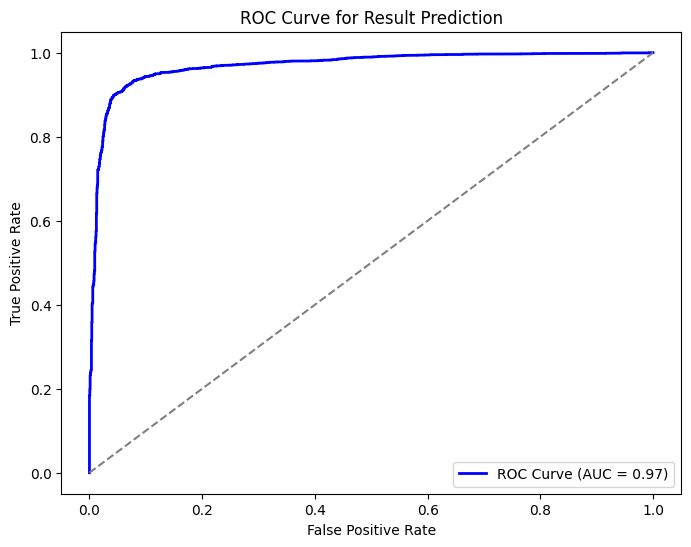

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_result, tpr_result, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_result:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Result Prediction')
plt.legend()
plt.show()

(24552,)
[[9.85617424e-001 3.81999264e-024 4.48192038e-009 ... 2.05108119e-050
  4.21391170e-019 1.43825712e-002]
 [1.40621054e-002 1.52139663e-020 1.97858987e-003 ... 3.18148189e-040
  1.07843884e-008 9.83959294e-001]
 [1.19106192e-021 9.72599596e-001 7.53509657e-012 ... 1.60972789e-065
  5.65378461e-008 2.74003478e-002]
 ...
 [7.60164209e-131 4.71265106e-032 3.26397250e-049 ... 7.36152266e-059
  1.04636822e-044 5.28218816e-007]
 [3.60079501e-001 1.74928662e-016 2.29168022e-019 ... 2.47268935e-041
  2.15379787e-008 6.39782478e-001]
 [9.25864806e-052 1.55031838e-004 1.22362602e-018 ... 2.27712007e-059
  2.79058166e-007 9.99844689e-001]]
Class Labels: ['Chronic Liver Diseases' 'Not Disorder' 'Cirrhosis' 'Hepatitis'
 'Fatty Liver Disease' 'Jaundice' 'Liver Disease' 'Liver Tumors']
Shape of y_disorder_test_bin: (6139, 8)
Shape of y_disorder_scores_test: (6139, 8)
Shape of y_disorder_test_bin: (6139, 8)
Unique values in y_disorder_test_bin: [0 1]
y_disorder_scores_test: [[9.85617424e-001 3

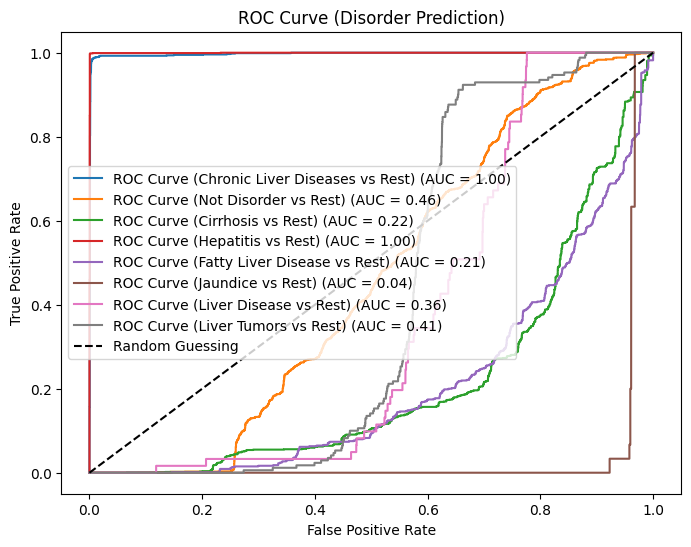

In [ ]:
# Calculate ROC AUC scores for 'Disorder' prediction
y_disorder_scores_train = mlp_classifier_disorder.predict_proba(X_train)[:, 1]
print(y_disorder_scores_train.shape)
y_disorder_scores_train = y_disorder_scores_train.reshape(-1, 1)
y_disorder_scores_train_proba = mlp_classifier_disorder.predict_proba(X_train)
# Ensure probability estimates sum up to 1 over classes
y_disorder_scores_train_proba /= y_disorder_scores_train_proba.sum(axis=1)[:, np.newaxis]
auc_train_disorder = roc_auc_score(y_disorder_train, y_disorder_scores_train_proba, multi_class='ovo')
y_disorder_scores_test = mlp_classifier_disorder.predict_proba(X_test)
print(y_disorder_scores_test)
auc_test_disorder = roc_auc_score(y_disorder_test, y_disorder_scores_test, multi_class='ovo')
y_disorder_scores_train = mlp_classifier_disorder.predict_proba(X_train)
class_labels = pd.Series(y_disorder_test).unique()
print("Class Labels:", class_labels)
y_disorder_test_bin = label_binarize(y_disorder_test, classes=class_labels)
print("Shape of y_disorder_test_bin:", y_disorder_test_bin.shape)
print("Shape of y_disorder_scores_test:", y_disorder_scores_test.shape)
print("Shape of y_disorder_test_bin:", y_disorder_test_bin.shape)
print("Unique values in y_disorder_test_bin:", np.unique(y_disorder_test_bin))
# Debugging: Print out the arrays for inspection
print("y_disorder_scores_test:", y_disorder_scores_test)
print("y_disorder_test_bin:", y_disorder_test_bin)
class_accuracies = {}

# Iterate over each class label
for i, class_label in enumerate(class_labels):
    # Find the indices where the true label matches the current class label
    class_indices = np.where(y_disorder_test == class_label)[0]

    # Get the predicted probabilities and true labels for samples belonging to this class
    class_predictions = y_disorder_scores_test[class_indices, i]
    true_labels = y_disorder_test_bin[class_indices, i]

    # Threshold the predicted probabilities to obtain class predictions
    class_predictions_thresholded = (class_predictions >= 0.5).astype(int)

    # Calculate accuracy for this class
    class_accuracy = accuracy_score(true_labels, class_predictions_thresholded)

    # Store the accuracy for this class label
    class_accuracies[class_label] = class_accuracy

# Print the accuracy for each class label
for class_label, accuracy in class_accuracies.items():
    print(f"Accuracy for class {class_label}: {accuracy:.2f}")
if isinstance(y_disorder_test, pd.Series):
    y_disorder_test = y_disorder_test.to_numpy()
n_classes = 8
fpr_disorder = dict()
tpr_disorder = dict()
roc_auc_disorder = dict()

for i in range(n_classes):
    fpr_disorder[i], tpr_disorder[i], _ = roc_curve(y_disorder_test_bin[:, i], y_disorder_scores_test[:, i])
    roc_auc_disorder[i] = auc(fpr_disorder[i], tpr_disorder[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_disorder[i], tpr_disorder[i], label='ROC Curve ({} vs Rest) (AUC = {:.2f})'.format(class_labels[i], roc_auc_disorder[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Disorder Prediction)')
plt.legend()
plt.show()

Shapes of true labels and predicted probabilities for 'Result' prediction:
True labels shape: (6139,)
Predicted probabilities shape: (6139,)

Shapes of true labels and predicted probabilities for 'disorder' prediction:
True labels shape: (6139,)
Predicted probabilities shape: (6139, 8)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: N

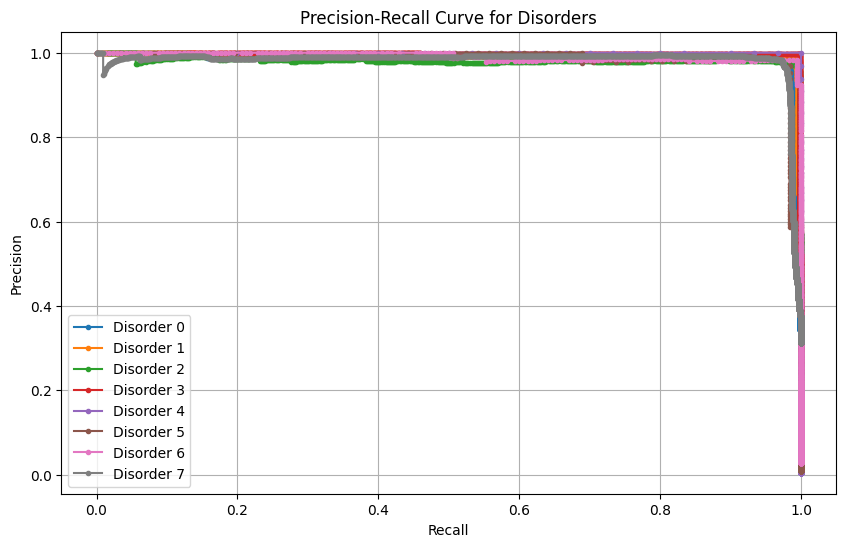

In [ ]:
# Assuming you have the true labels stored in y_true
y_true_result = y_result_test  # Assuming this is how you obtain true labels for the 'Result' prediction
y_true_disorder = y_disorder_test  # Assuming this is how you obtain true labels for the 'disorder' prediction

# Assuming you have calculated the predicted probabilities for each class
y_proba_result = y_result_scores_test  # Replace this with your actual predicted probabilities for 'Result' prediction
y_proba_disorder = y_disorder_scores_test  # Replace this with your actual predicted probabilities for 'disorder' prediction

# Check shapes of true labels and predicted probabilities
print("Shapes of true labels and predicted probabilities for 'Result' prediction:")
print("True labels shape:", y_true_result.shape)
print("Predicted probabilities shape:", y_proba_result.shape)

print("\nShapes of true labels and predicted probabilities for 'disorder' prediction:")
print("True labels shape:", y_true_disorder.shape)
print("Predicted probabilities shape:", y_proba_disorder.shape)
y_true_disorder_bin = label_binarize(y_true_disorder, classes=np.unique(y_true_disorder))
# Initialize dictionaries to store precision, recall, and thresholds for each class
precision_dict = {}
recall_dict = {}
thresholds_dict = {}

# Iterate over each class
for class_label in range(y_proba_disorder.shape[1]):
    # Compute precision, recall, and thresholds for the current class
    precision, recall, thresholds = precision_recall_curve(y_true_disorder == class_label, y_proba_disorder[:, class_label])
    
    # Store precision, recall, and thresholds for the current class
    precision_dict[class_label] = precision
    recall_dict[class_label] = recall
    thresholds_dict[class_label] = thresholds

# Choose the predicted probabilities for the positive class in the 'disorder' prediction
# You need to determine the index of the positive class in the 'disorder' prediction
positive_class_index_disorder = 0  # Adjust this index accordingly based on your class encoding

precisions = []
recalls = []

# Iterate over each class
for class_index in range(y_proba_disorder.shape[1]):
    # Compute precision, recall, and thresholds for the current class
    precision, recall, _ = precision_recall_curve(
        y_true_disorder_bin[:, class_index], y_proba_disorder[:, class_index]
    )
    
    # Append precision and recall values to lists
    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 6))
for class_index in range(y_proba_disorder.shape[1]):
    plt.plot(recalls[class_index], precisions[class_index], marker='.', label=f'Disorder {class_index}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Disorders')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize a list to store accuracies for each disorder
accuracies = []

# Iterate over each class
for class_index in range(y_proba_disorder.shape[1]):
    # Predicted class labels are the class with the highest predicted probability
    predicted_labels = np.argmax(y_proba_disorder, axis=1)
    
    # True class labels
    true_labels = y_true_disorder
    
    # Filter true and predicted labels for the current class
    true_labels_class = (true_labels == class_index)
    predicted_labels_class = (predicted_labels == class_index)
    
    # Compute accuracy for the current class
    accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    
    # Append accuracy to the list
    accuracies.append(accuracy)
# Print accuracies for each disorder
for class_index, accuracy in enumerate(accuracies):
    print(f"Accuracy for Disorder {class_index}: {accuracy:.4f}")
# Plot the distribution of accuracies for each disorder
class_distribution = y_result_train.value_counts()
print("Class Distribution:\n", class_distribution)
# Apply SMOTE resampling to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_result_train)
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_result_train), y=y_result_train)
class_weight_dict = dict(zip(np.unique(y_result_train), class_weights))
# Instantiate PolynomialFeatures to create interaction terms up to degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Print the shape of the transformed feature matrices
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of X_test_poly:", X_test_poly.shape)

# Alternatively, you can inspect the first few rows of the transformed feature matrices
print("Sample data from X_train_poly:")
print(X_train_poly[:5])  # Print the first 5 rows
print("Sample data from X_test_poly:")
print(X_test_poly[:5])   # Print the first 5 rows
joblib.dump(mlp_classifier, 'scikit_model.joblib')
# Choose the optimal threshold based on the ROC curve or other metrics
# For example, you can choose the threshold that maximizes the F1-score
# Calculate F1-score for each threshold
f1_scores = [f1_score(y_result_test, y_proba_result >= threshold) for threshold in thresholds]

# Find the threshold that maximizes the F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_f1_score = f1_scores[optimal_threshold_index]
print("Optimal Threshold (Maximizing F1-score):", optimal_threshold)
print("F1-score at Optimal Threshold:", optimal_f1_score)

Accuracy for Disorder 0: 0.8469
Accuracy for Disorder 1: 0.8220
Accuracy for Disorder 2: 0.8912
Accuracy for Disorder 3: 0.7969
Accuracy for Disorder 4: 0.9950
Accuracy for Disorder 5: 0.9902
Accuracy for Disorder 6: 0.9718
Accuracy for Disorder 7: 0.6861
Class Distribution:
 Result
1.0    17488
0.0     7064
Name: count, dtype: int64
Shape of X_train_poly: (24552, 56)
Shape of X_test_poly: (6139, 56)
Sample data from X_train_poly:
[[ 1.         -1.25626205 -1.68251682 -0.42123015 -0.46254322 -0.64268523
  -0.29816925 -0.30801533 -0.07604024  0.21164547  0.17097984  2.11368203
   0.52917545  0.58107549  0.80738106  0.37457871  0.38694797  0.09552647
  -0.26588218 -0.21479549  0.70872682  0.77823675  1.08132871  0.50167478
   0.51824097  0.12793898 -0.35609707 -0.28767646  0.19483715  0.2707184
   0.12559788  0.12974534  0.03203044 -0.08915145 -0.07202187  0.2972697
   0.13791616  0.1424704   0.0351719  -0.09789518 -0.07908557  0.19162897
   0.1979569   0.04886994 -0.13602142 -0.10988622